<a href="https://colab.research.google.com/github/Satyanarayana53/KILL_CSC-DS_T1/blob/main/Stock_Market_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KILL CSC(DS) TEAM - 1


# Introduction to Stock Market Price Prediction
Stock market price prediction is the process of using historical data, statistical models, and machine learning techniques to forecast the future prices of stocks. Since stock prices fluctuate based on market trends, economic conditions, and investor sentiment, predicting them accurately is a challenging task.

# Why Predict Stock Prices?
1. Investment Decisions: Investors and traders use predictions to make informed decisions on buying, holding, or selling stocks.
2. Risk Management: Predicting price movements helps minimize losses and manage portfolio risks.
Algorithmic Trading: Many hedge funds and financial institutions use automated models for high-frequency trading.
3. Market Analysis: Understanding trends in stock prices aids in market analysis and economic forecasting.

# Methods Used for Prediction
1. Traditional Statistical Models:
* Moving Averages
* ARIMA (AutoRegressive Integrated Moving Average)
2. Machine Learning Approaches:
* Linear Regression
* Support Vector Machines (SVM)
* Random Forest
3. Deep Learning Models:
* LSTM (Long Short-Term Memory) Networks
* Recurrent Neural Networks (RNN)
4. Sentiment Analysis:
* Analyzing news articles, social media, and financial reports to predict price movements.

In [1]:
pip install --upgrade yfinance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import yfinance as yf
from dateutil.relativedelta import relativedelta

# Set seaborn style
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# Define stocks and date range
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = end - relativedelta(years=1)  # Safer date calculation

# Fetch stock data
data_dict = {stock: yf.download(stock, start=start, end=end) for stock in tech_list}

# Check for empty data
for stock, data in data_dict.items():
    print(f"{stock}: {data.shape}")  # Ensure data is downloaded

# Assign company names safely
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]
for stock, name in zip(tech_list, company_name):
    data_dict[stock].loc[:, "company_name"] = name

# Filter out empty DataFrames before concatenation
valid_data = [data for data in data_dict.values() if not data.empty]
df = pd.concat(valid_data, axis=0) if valid_data else pd.DataFrame()

# Display last 10 rows
print(df.tail(10))


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AAPL: (249, 5)
GOOG: (249, 5)
MSFT: (249, 5)
AMZN: (249, 5)
Price      Close High  Low Open Volume company_name Close High  Low Open  ...  \
Ticker      AAPL AAPL AAPL AAPL   AAPL               GOOG GOOG GOOG GOOG  ...   
Date                                                                      ...   
2025-03-03   NaN  NaN  NaN  NaN    NaN       AMAZON   NaN  NaN  NaN  NaN  ...   
2025-03-04   NaN  NaN  NaN  NaN    NaN       AMAZON   NaN  NaN  NaN  NaN  ...   
2025-03-05   NaN  NaN  NaN  NaN    NaN       AMAZON   NaN  NaN  NaN  NaN  ...   
2025-03-06   NaN  NaN  NaN  NaN    NaN       AMAZON   NaN  NaN  NaN  NaN  ...   
2025-03-07   NaN  NaN  NaN  NaN    NaN       AMAZON   NaN  NaN  NaN  NaN  ...   
2025-03-10   NaN  NaN  NaN  NaN    NaN       AMAZON   NaN  NaN  NaN  NaN  ...   
2025-03-11   NaN  NaN  NaN  NaN    NaN       AMAZON   NaN  NaN  NaN  NaN  ...   
2025-03-12   NaN  NaN  NaN  NaN    NaN       AMAZON   NaN  NaN  NaN  NaN  ...   
2025-03-13   NaN  NaN  NaN  NaN    NaN       AMAZ

In [3]:
data_dict['AAPL'].describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,217.090518,219.098536,214.827863,216.874180,5.561444e+07
std,24.371738,24.493796,23.972061,24.294473,3.051029e+07
min,164.224564,165.617978,163.308889,164.572913,2.323470e+07
25%,207.442795,211.180254,205.698654,206.206940,4.039830e+07
50%,224.752884,226.401075,222.530230,224.493183,4.842300e+07
75%,232.887436,234.623621,229.487690,232.807625,6.088230e+07
max,258.735504,259.814335,257.347047,257.906429,3.186799e+08


In [4]:
data_dict['AAPL'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2024-03-18 to 2025-03-14
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, AAPL)     249 non-null    float64
 1   (High, AAPL)      249 non-null    float64
 2   (Low, AAPL)       249 non-null    float64
 3   (Open, AAPL)      249 non-null    float64
 4   (Volume, AAPL)    249 non-null    int64  
 5   (company_name, )  249 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 13.6+ KB


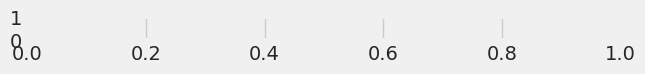

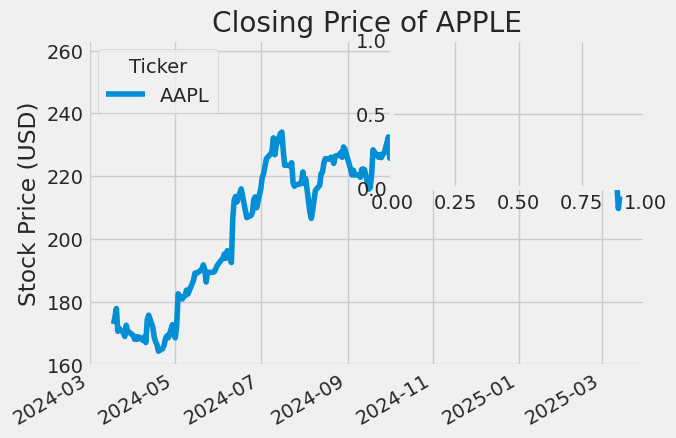

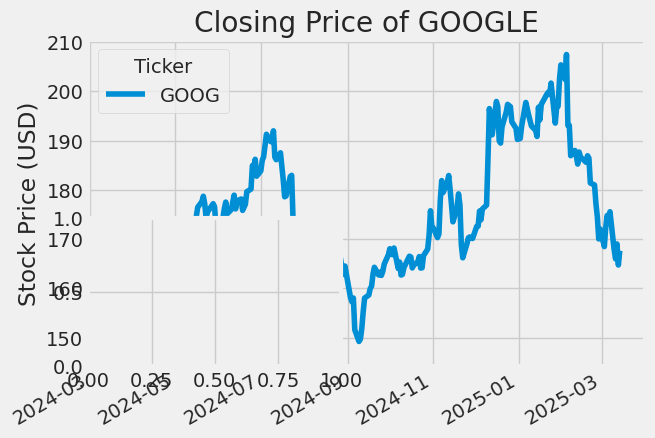

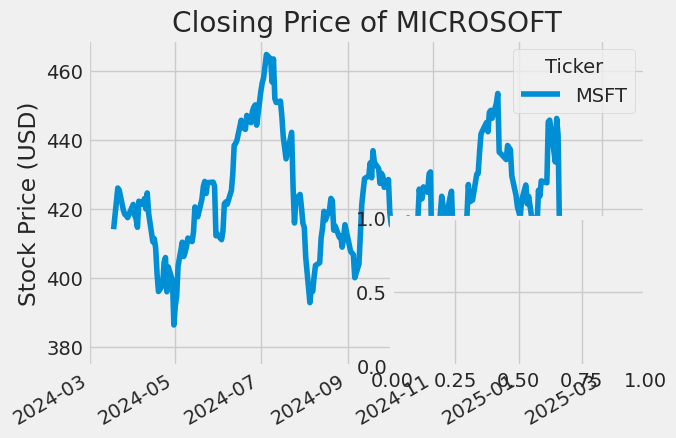

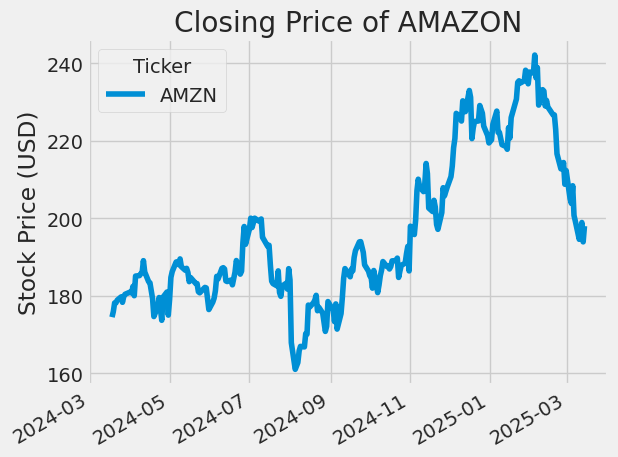

In [5]:
# Plot Closing Prices for each stock
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, (stock, name) in enumerate(zip(tech_list, company_name), 1):
    plt.subplot(2, 2, i)

    # Check if 'Adj Close' exists, otherwise use 'Close'
    column_name = 'Adj Close' if 'Adj Close' in data_dict[stock].columns else 'Close'

    data_dict[stock][column_name].plot()
    plt.ylabel('Stock Price (USD)')
    plt.xlabel(None)
    plt.title(f"Closing Price of {name}")

plt.tight_layout()
plt.show()


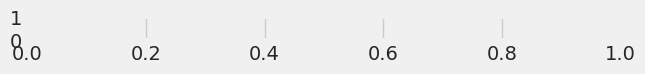

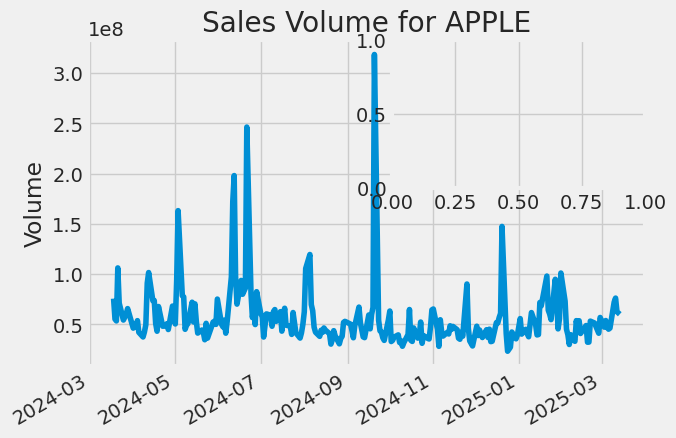

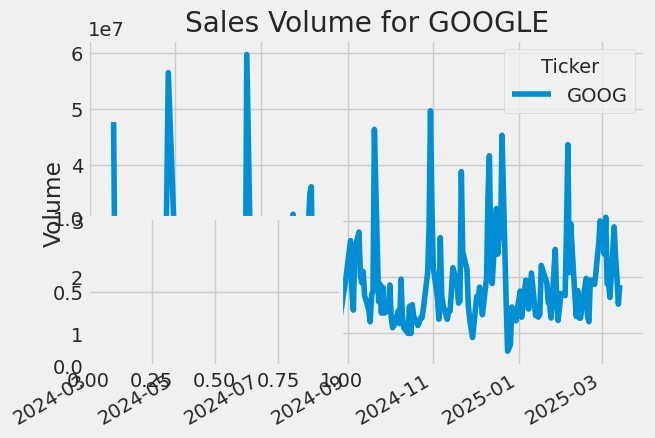

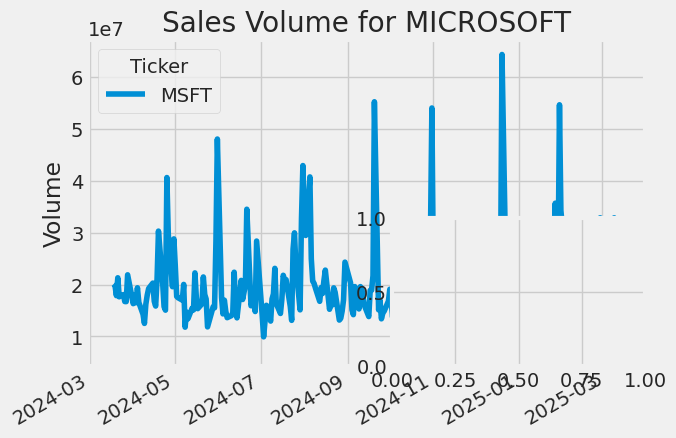

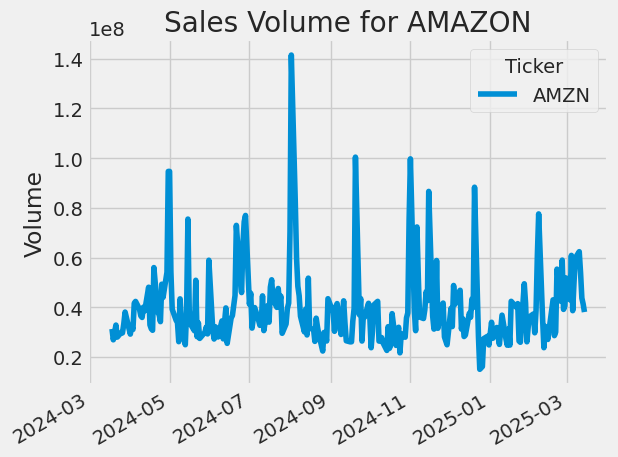

In [6]:
# Plot Total Volume of Stocks Traded Each Day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, (stock, name) in enumerate(zip(tech_list, company_name), 1):
    plt.subplot(2, 2, i)

    # Ensure the 'Volume' column exists
    if 'Volume' in data_dict[stock].columns:
        data_dict[stock]['Volume'].plot()
        plt.ylabel('Volume')
        plt.xlabel(None)
        plt.title(f"Sales Volume for {name}")
    else:
        plt.text(0.5, 0.5, "No Volume Data Available", fontsize=12, ha='center')

plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


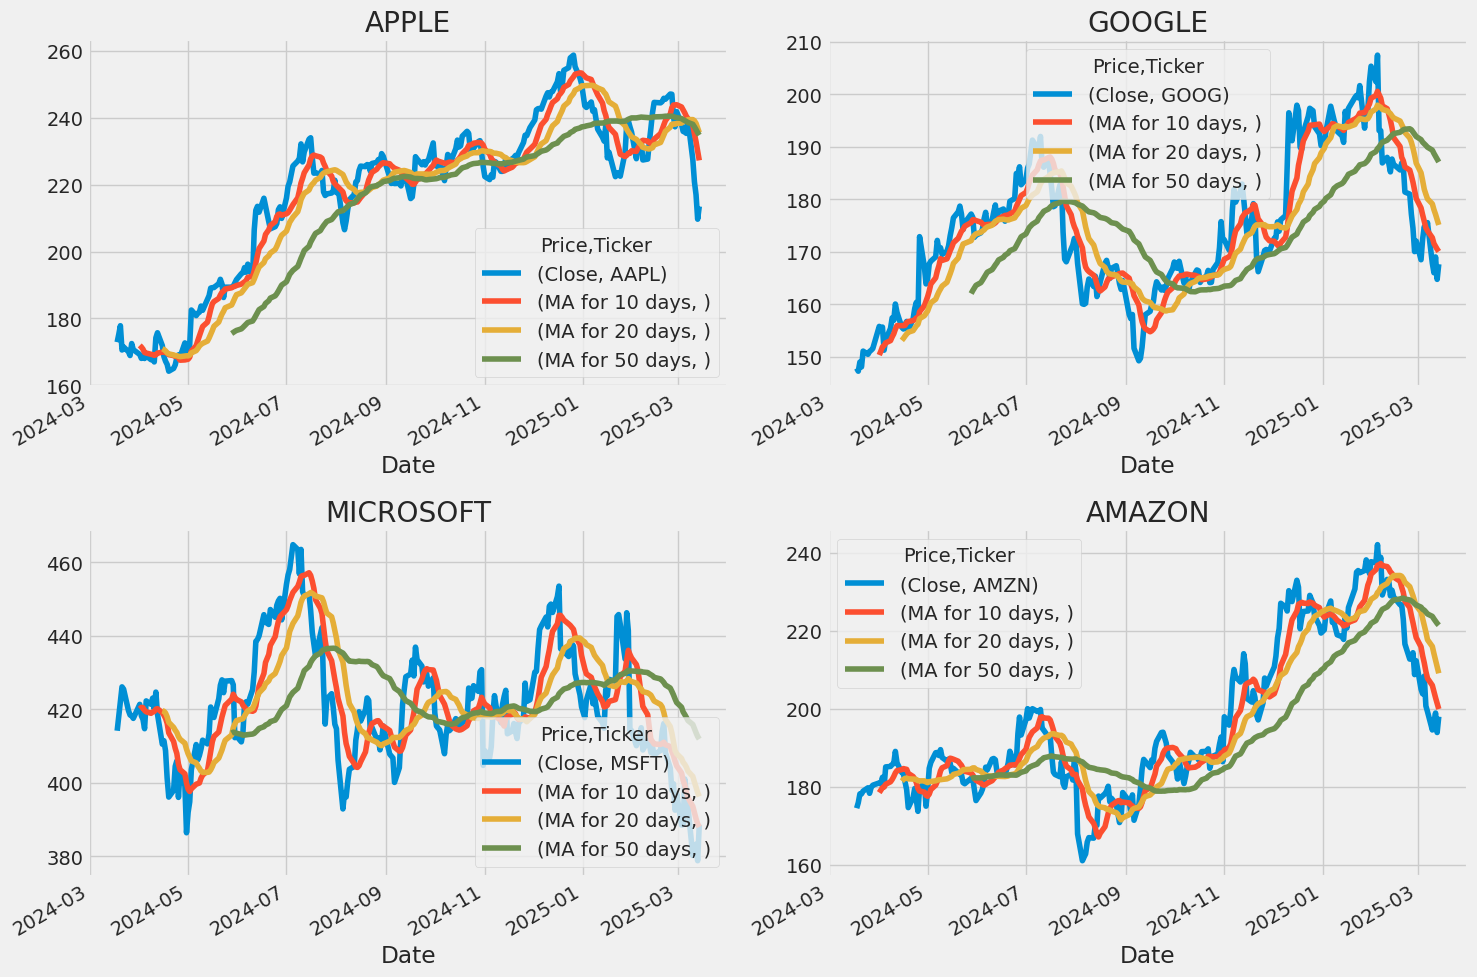

In [7]:
# Define moving average periods
ma_day = [10, 20, 50]

# Fetch stock data
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
data_dict = {stock: yf.download(stock, start=start, end=end) for stock in tech_list}

# Assign moving averages
for ma in ma_day:
    for company in data_dict.values():
        column_name = f"MA for {ma} days"
        price_column = 'Adj Close' if 'Adj Close' in company.columns else 'Close'
        company.loc[:, column_name] = company[price_column].rolling(ma).mean()

# Plot moving averages
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, (stock, name) in enumerate(zip(tech_list, company_name)):
    ax = axes[i // 2, i % 2]  # Subplot position
    price_column = 'Adj Close' if 'Adj Close' in data_dict[stock].columns else 'Close'

    # Select only available columns
    plot_cols = [col for col in [price_column, 'MA for 10 days', 'MA for 20 days', 'MA for 50 days'] if col in data_dict[stock].columns]

    data_dict[stock][plot_cols].plot(ax=ax)
    ax.set_title(name)

fig.tight_layout()
plt.show()

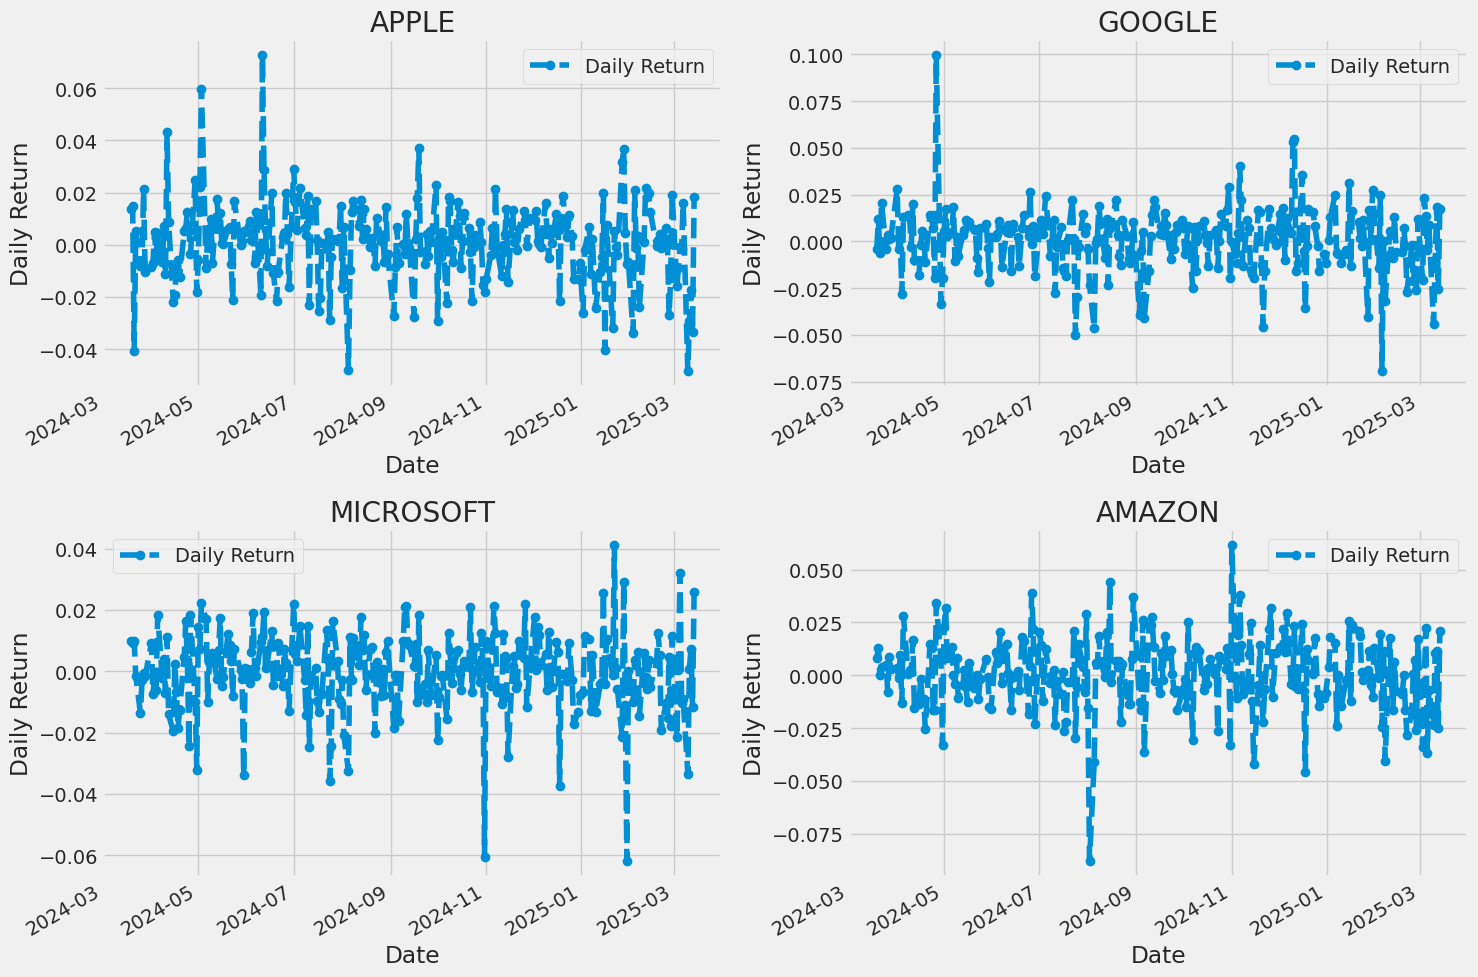

In [8]:
# Calculate daily return for each company
for company in data_dict.values():
    price_column = 'Adj Close' if 'Adj Close' in company.columns else 'Close'
    company['Daily Return'] = company[price_column].pct_change()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Ensure correct plotting and avoid key errors
for i, (stock, name) in enumerate(zip(tech_list, company_name)):
    ax = axes[i // 2, i % 2]  # Arrange in 2x2 grid

    # Check if 'Daily Return' exists before plotting
    if 'Daily Return' in data_dict[stock].columns:
        data_dict[stock]['Daily Return'].plot(ax=ax, legend=True, linestyle='--', marker='o')
        ax.set_title(name)
        ax.set_ylabel("Daily Return")
    else:
        ax.text(0.5, 0.5, "No Data Available", fontsize=12, ha='center')

fig.tight_layout()
plt.show()


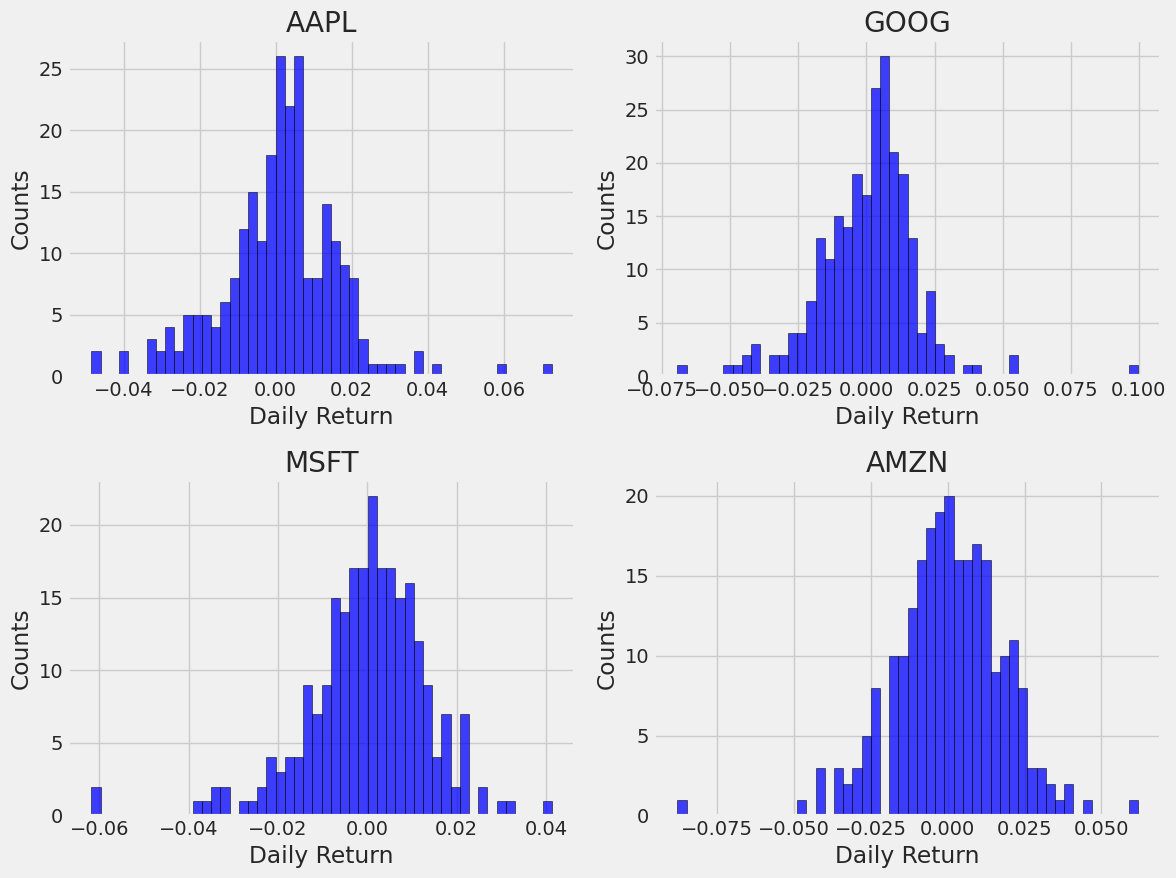

In [9]:
plt.figure(figsize=(12, 9))

for i, (stock, company) in enumerate(data_dict.items(), 1):
    plt.subplot(2, 2, i)

    # Ensure 'Daily Return' exists and contains valid data
    if 'Daily Return' in company.columns and not company['Daily Return'].isnull().all():
        company['Daily Return'].hist(bins=50, alpha=0.75, color='blue', edgecolor='black')
        plt.xlabel('Daily Return')
        plt.ylabel('Counts')
        plt.title(stock)  # Using stock symbol as title
    else:
        plt.text(0.5, 0.5, "No Data Available", fontsize=12, ha='center')

plt.tight_layout()
plt.show()


In [10]:
# Fetch stock data (only 'Close' prices)
stock_data = yf.download(tech_list, start=start, end=end)['Close']

# Compute percentage change (daily returns)
tech_rets = stock_data.pct_change().dropna()  # Removes NaN values in the first row

# Display first few rows
print(tech_rets.head())


[*********************100%***********************]  4 of 4 completed

Ticker          AAPL      AMZN      GOOG      MSFT
Date                                              
2024-03-19  0.013585  0.008138 -0.003772  0.009801
2024-03-20  0.014709  0.012791  0.011898  0.009065
2024-03-21 -0.040857  0.000000 -0.006280  0.009736
2024-03-22  0.005310  0.004042  0.020371 -0.001467
2024-03-25 -0.008300  0.004696 -0.004085 -0.013715


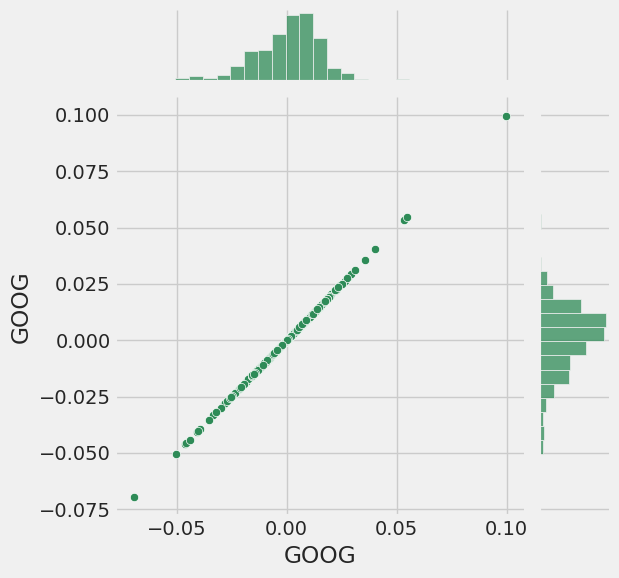

In [11]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

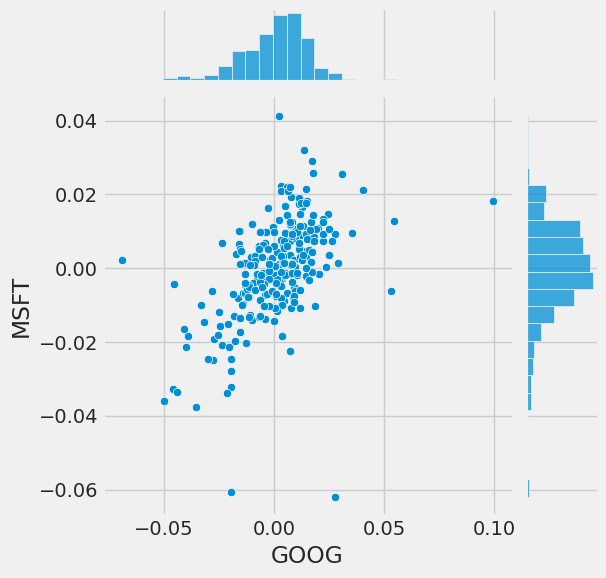

In [12]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

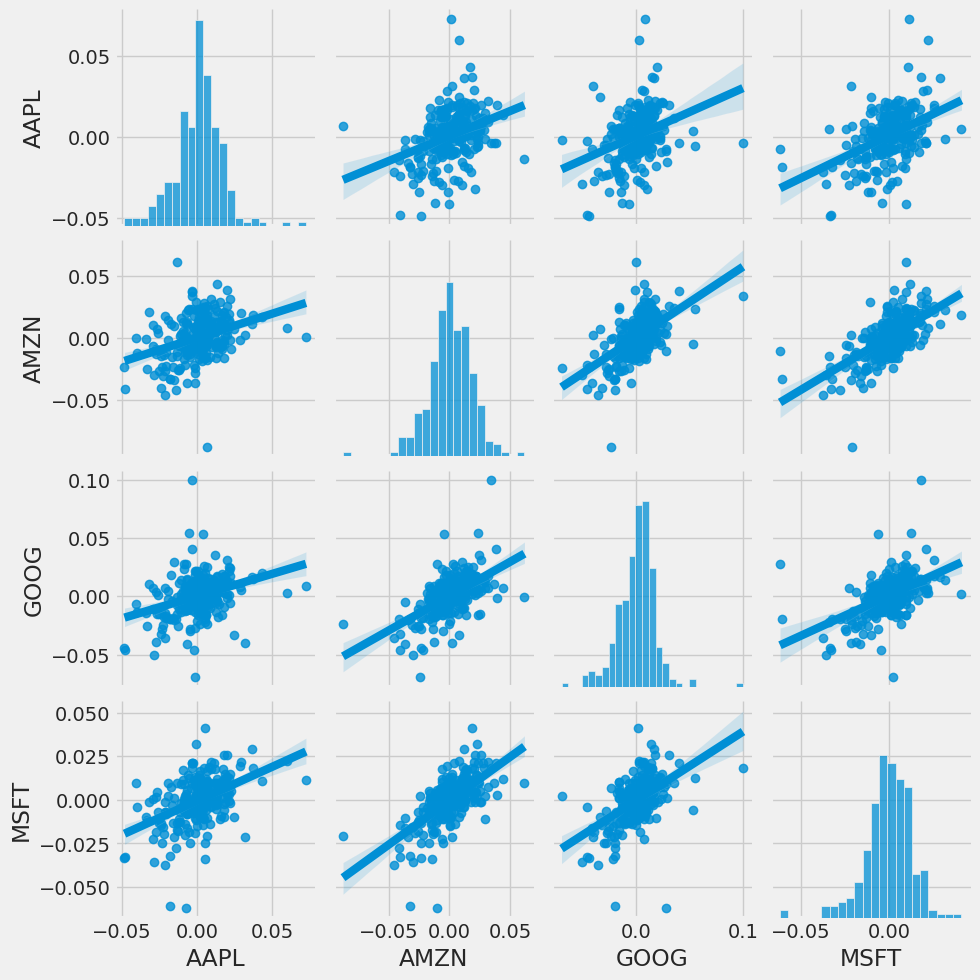

In [13]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

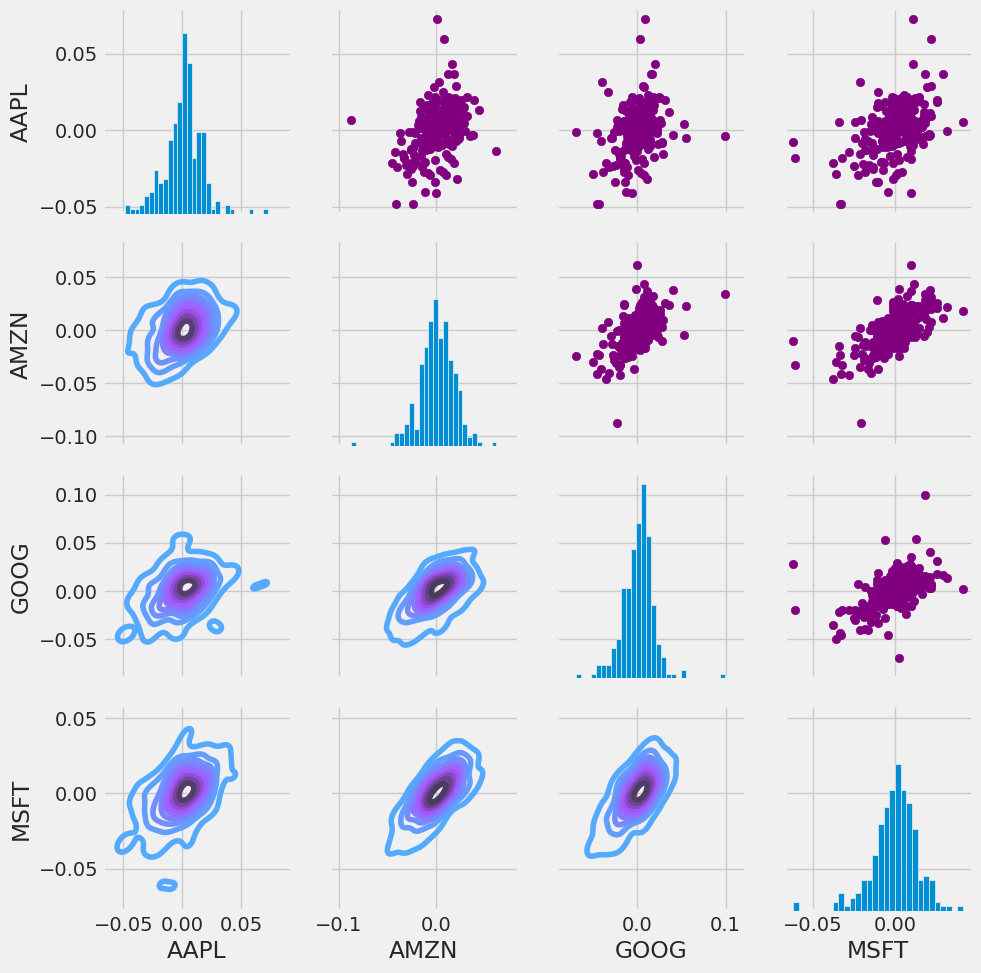

In [14]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

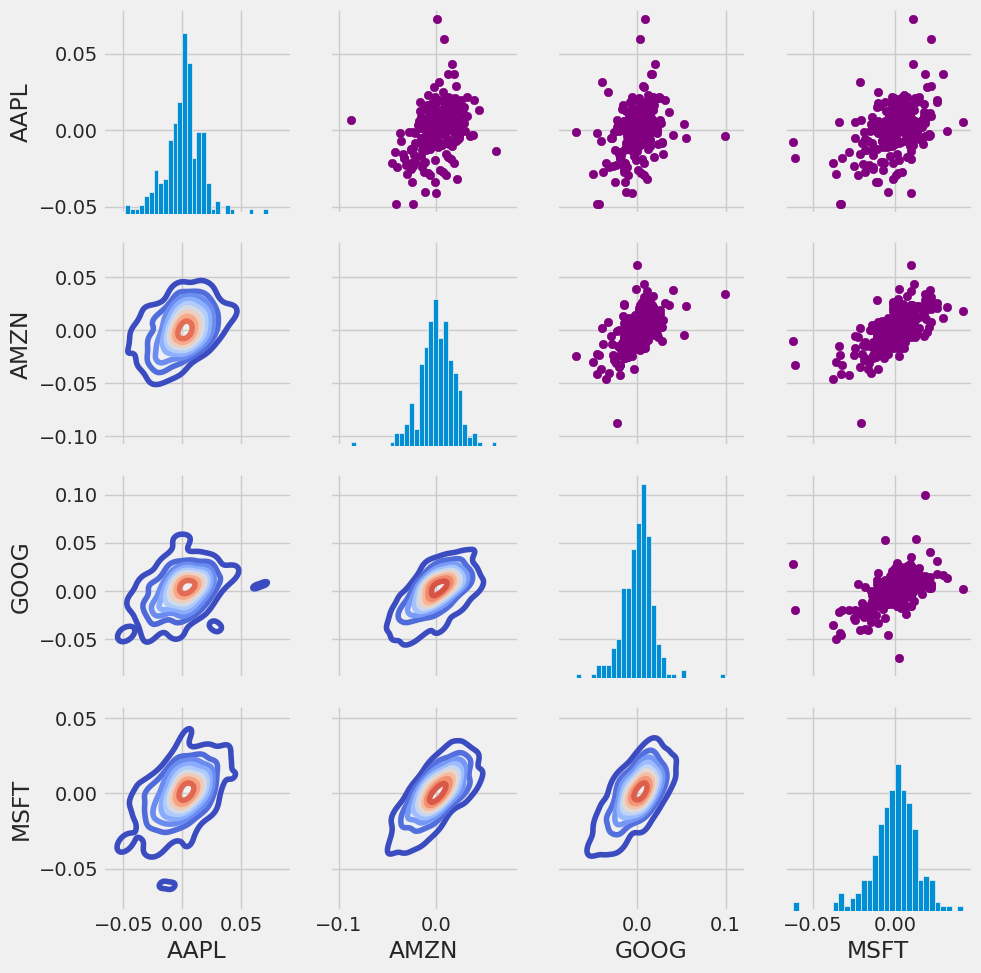

In [15]:
# Use percentage returns for visualization
return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='coolwarm')  # Fixed colormap
return_fig.map_diag(plt.hist, bins=30)

plt.show()


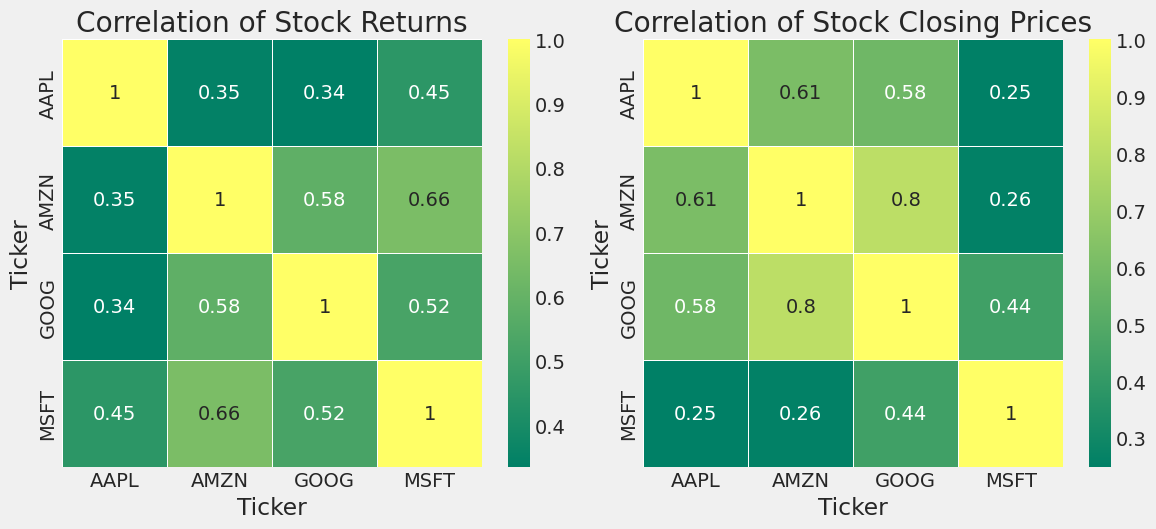

In [16]:
plt.figure(figsize=(12, 10))

# First subplot - Stock Returns Correlation
plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer', linewidths=0.5)
plt.title('Correlation of Stock Returns')

# Second subplot - Stock Closing Price Correlation
plt.subplot(2, 2, 2)
sns.heatmap(stock_data.corr(), annot=True, cmap='summer', linewidths=0.5)
plt.title('Correlation of Stock Closing Prices')

plt.tight_layout()  # Avoid overlapping
plt.show()  # Display the plots


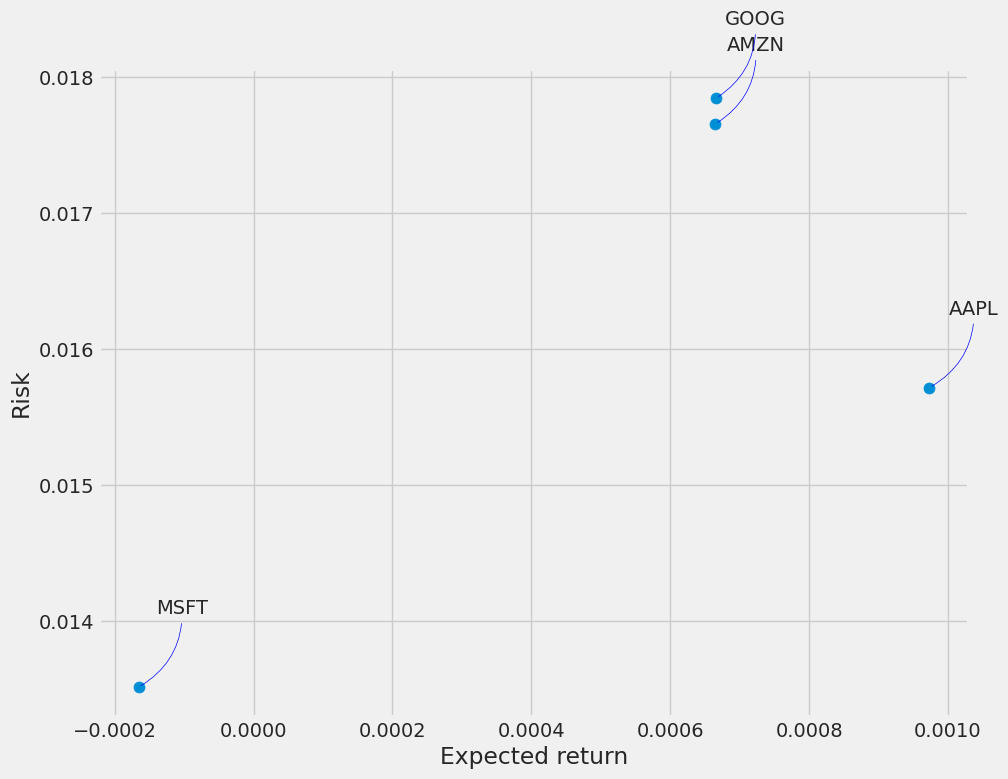

In [17]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [18]:
# Get the stock quote
df = yf.download('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2012-01-03,12.375389,12.413608,12.308281,12.320319,302220800
2012-01-04,12.441897,12.479214,12.316708,12.338375,260022000
2012-01-05,12.580030,12.595679,12.418728,12.487342,271269600
2012-01-06,12.711534,12.722066,12.615836,12.632388,318292800
2012-01-09,12.691370,12.872534,12.679934,12.804823,394024400
...,...,...,...,...,...
2025-03-10,227.479996,236.160004,224.220001,235.539993,72071200
2025-03-11,220.839996,225.839996,217.449997,223.809998,76137400


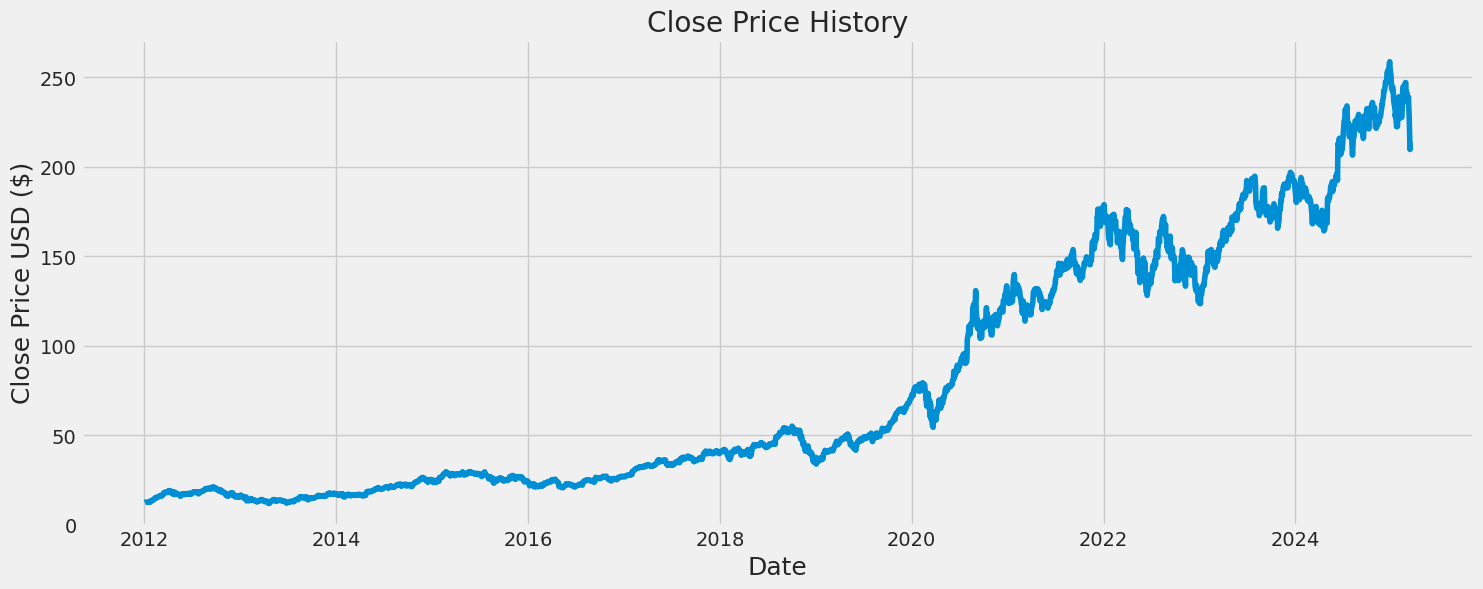

In [19]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [20]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len
df


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2012-01-03,12.375389,12.413608,12.308281,12.320319,302220800
2012-01-04,12.441897,12.479214,12.316708,12.338375,260022000
2012-01-05,12.580030,12.595679,12.418728,12.487342,271269600
2012-01-06,12.711534,12.722066,12.615836,12.632388,318292800
2012-01-09,12.691370,12.872534,12.679934,12.804823,394024400
...,...,...,...,...,...
2025-03-10,227.479996,236.160004,224.220001,235.539993,72071200
2025-03-11,220.839996,225.839996,217.449997,223.809998,76137400


In [21]:
# Select 'Close' column correctly from MultiIndex DataFrame
data = df[('Close', 'AAPL')].copy()  # Use both index levels

# Convert to NumPy array and reshape to 2D
dataset = data.values.reshape(-1, 1)

# Debugging: Check dataset
print("Dataset Shape:", dataset.shape)
print("Dataset Preview:", dataset[:5])


Dataset Shape: (3319, 1)
Dataset Preview: [[12.3753891 ]
 [12.44189739]
 [12.58003044]
 [12.71153355]
 [12.69137001]]


In [22]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0018211 ],
       [0.00209057],
       [0.00265025],
       ...,
       [0.83081893],
       [0.80124146],
       [0.81667852]])

In [23]:

# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.0018211 , 0.00209057, 0.00265025, 0.00318306, 0.00310136,
       0.00328547, 0.00320135, 0.00305991, 0.00286726, 0.00346352,
       0.00400124, 0.0038354 , 0.00292701, 0.00379394, 0.00294043,
       0.0061411 , 0.00589359, 0.0062167 , 0.00691536, 0.00733847,
       0.00730311, 0.00717264, 0.00772863, 0.00825172, 0.00884429,
       0.00980146, 0.01181206, 0.01184256, 0.01296187, 0.01379831,
       0.01236079, 0.01291435, 0.01290337, 0.01445555, 0.01423483,
       0.01464331, 0.01537735, 0.01578579, 0.01696243, 0.01781956,
       0.01806711, 0.01815368, 0.01668806, 0.01633447, 0.01638694,
       0.01776473, 0.01815246, 0.01898526, 0.02094834, 0.02356741,
       0.02307723, 0.02307843, 0.02497204, 0.02556461, 0.02514275,
       0.02475745, 0.02435629, 0.025689  , 0.02660346, 0.0269863 ])]
[0.026040125209022574]

[array([0.0018211 , 0.00209057, 0.00265025, 0.00318306, 0.00310136,
       0.00328547, 0.00320135, 0.00305991, 0.00286726, 0.00346352,
       0.00400124, 0.0038354 , 0.0

In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3094/3094 ━━━━━━━━━━━━━━━━━━━━ 160s 51ms/step - loss: 0.0012


In [25]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


16.72374873836479

Columns in DataFrame: MultiIndex([('Close', 'AAPL')],
           )


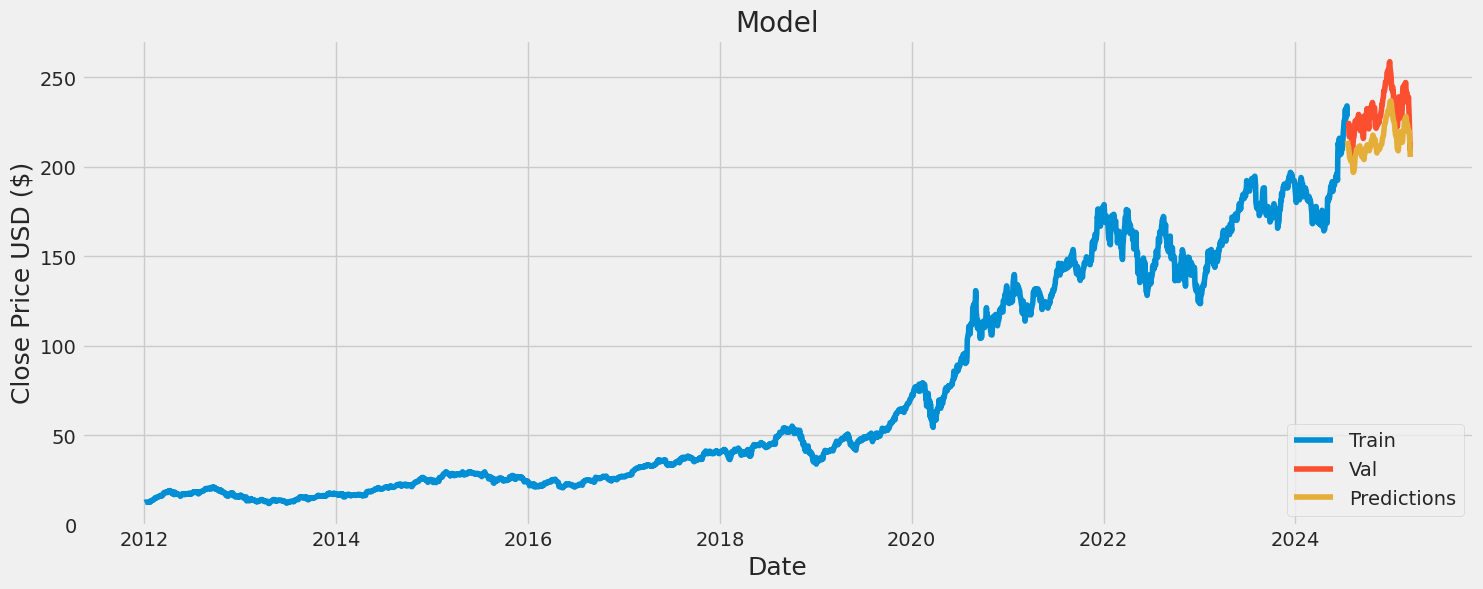

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Check if data is a DataFrame
if isinstance(data, pd.Series):
    data = data.to_frame()

# Print the available columns to confirm
print("Columns in DataFrame:", data.columns)

# Set correct column name
column_name = 'AAPL' if 'AAPL' in data.columns else data.columns[0]

# Split the data
train = data.iloc[:training_data_len]
valid = data.iloc[training_data_len:].copy()

# Ensure valid and predictions are the same length
if len(valid) != len(predictions):
    valid = valid.iloc[:len(predictions)].copy()

# Assign predictions safely
valid['Predictions'] = predictions

# Plot the data
plt.figure(figsize=(16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train[column_name], label='Train')
plt.plot(valid[column_name], label='Val')
plt.plot(valid['Predictions'], label='Predictions')
plt.legend(loc='lower right')
plt.show()


In [35]:
# Show the valid and predicted prices
valid

,Close,Predictions
,AAPL,
Date,,
2024-07-18,223.429062,214.570084
2024-07-19,223.558624,212.785614
2024-07-22,223.209808,210.950012
2024-07-23,224.256287,209.463348
2024-07-24,217.807953,208.720505
...,...,...
2025-03-10,227.479996,219.967361
2025-03-11,220.839996,218.114502


# Conclusion
Our project, Stock Market Price Prediction, aimed to develop a machine learning model capable of forecasting stock prices based on historical data. We implemented data preprocessing, exploratory data analysis, feature engineering and model training using advanced techniques to ensure accurate predictions.

As the backend programmer, I, Pilla Sreebala Veera Venkata Satyanarayana (Roll No: 23B21A4630), was responsible for handling the backend operations, including data processing, API integration, and model deployment. My role involved optimizing data pipelines, structuring the database, and ensuring seamless communication between the frontend and the machine learning model.

This project was successfully completed through the collaborative efforts of our team:

1. Kamuju Satya Priyanka (Roll No: 23B21A4608)
2. Velnati Veera Naga Satya Sai Ram (Roll No: 23B21A4609)
3. Sanaboyina Reshma (Roll No: 23B21A4615)
4. Makineedi Sri Lalitha (Roll No: 23B21A4611)
5. Kovvuri Venkata Navaneeth Reddy (Roll No: 23B21A4644)

Each member contributed significantly to different aspects of the project, from frontend development to data analysis and model evaluation. Through teamwork and effective problem-solving, we successfully built a predictive model that can assist investors in making informed decisions.

This project has provided us with valuable insights into machine learning, data science, and stock market analysis, enhancing our technical expertise and teamwork skills. We look forward to further refining our model and exploring more advanced predictive techniques in the future.

------------------------